### Stock Market Prediction And Forecasting Using Stacked LSTM for NSE-Tata-Global-Beverages-Ltd

Author - Sagnick Bhar

### Importing Dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('../input/tata-set/NSE-Tata-Global-Beverages-Limited.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [5]:
## Selecting the 'close' column for our forecasting
df1=df.reset_index()['Close']

In [6]:
df1

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

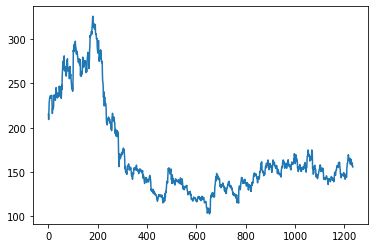

In [7]:
#Plotting the data
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np

In [9]:
### Note: LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.50425818]
 [0.47758853]
 [0.51792918]
 ...
 [0.25773196]
 [0.2371134 ]
 [0.23823398]]


In [11]:
##splitting Dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(802, 433)

In [13]:
train_data[0:5,]

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       [0.56006275],
       [0.57485433]])

In [14]:
import numpy
# convert an array of values into a Dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, dataX:0,1,2,3-----99   dataY:100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(701, 100)
(701,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(332, 100)
(332,)


(None, None)

In [18]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


2022-04-30 14:14:50.705921: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 14:14:50.844153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 14:14:50.845661: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 14:14:50.847989: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

2022-04-30 14:14:54.738779: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-04-30 14:15:00.241562: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


11/11 [==============================] - 9s 154ms/step - loss: 0.0561 - val_loss: 0.0093
Epoch 2/100
11/11 [==============================] - 0s 26ms/step - loss: 0.0108 - val_loss: 0.0012
Epoch 3/100
11/11 [==============================] - 0s 24ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 4/100
11/11 [==============================] - 0s 24ms/step - loss: 0.0031 - val_loss: 0.0010
Epoch 5/100
11/11 [==============================] - 0s 25ms/step - loss: 0.0027 - val_loss: 9.0031e-04
Epoch 6/100
11/11 [==============================] - 0s 27ms/step - loss: 0.0027 - val_loss: 9.6928e-04
Epoch 7/100
11/11 [==============================] - 0s 25ms/step - loss: 0.0025 - val_loss: 8.7282e-04
Epoch 8/100
11/11 [==============================] - 0s 26ms/step - loss: 0.0025 - val_loss: 9.4970e-04
Epoch 9/100
11/11 [==============================] - 0s 25ms/step - loss: 0.0023 - val_loss: 9.7238e-04
Epoch 10/100
11/11 [==============================] - 0s 27ms/step - loss: 0.0022 - val_los

In [23]:
### Lets Do the prediction and check Performance Metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

180.02595594932964

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

154.97460186702534

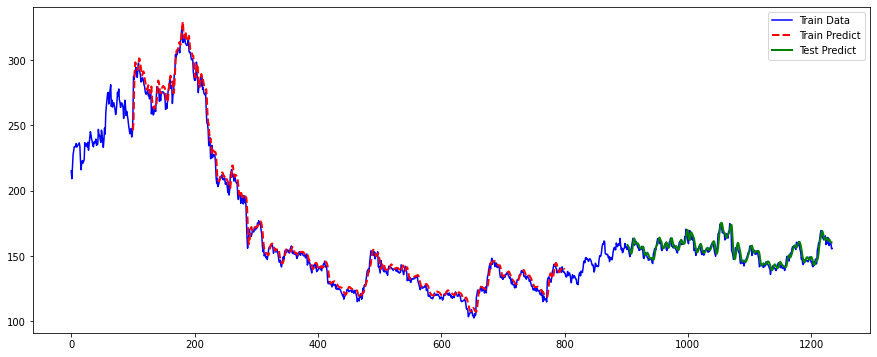

In [27]:
### Plotting Data
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(df1), '-b', label='Train Data')
plt.plot(trainPredictPlot,'--r', label='Train Predict',linewidth=2.0)
plt.plot(testPredictPlot,'g', label='Test Predict', linewidth=2.0)
leg = plt.legend();
plt.show()

### Predicting Next 30 days

In [28]:
len(test_data)

433

In [29]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 92)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input[0:5]

[0.16248319139399375,
 0.16987897803675484,
 0.17525773195876287,
 0.1855670103092784,
 0.18915284625728362]

In [32]:
# Demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=92
i=0
while(i<30):
    
    if(len(temp_input)>92):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

[0.24819353]
93
1 day input [0.16987898 0.17525773 0.18556701 0.18915285 0.18354998 0.1824294
 0.17256835 0.18108472 0.18153294 0.17055132 0.17189601 0.16943075
 0.17705065 0.16270731 0.17346481 0.18646347 0.20416853 0.21156432
 0.20259973 0.20461676 0.19520394 0.20797848 0.22142537 0.22142537
 0.22523532 0.23890632 0.2447333  0.24406096 0.24137158 0.24271627
 0.24069924 0.23442403 0.25930076 0.25907665 0.25616316 0.24831914
 0.26176602 0.2447333  0.23330345 0.22613178 0.20103093 0.20416853
 0.18870462 0.18287763 0.19049753 0.19766921 0.19878978 0.20080681
 0.19744509 0.19520394 0.19722098 0.19229045 0.19789332 0.20909906
 0.20730614 0.20170327 0.19004931 0.19206634 0.17817122 0.17548185
 0.18377409 0.19139399 0.18780816 0.20192739 0.18511878 0.18668758
 0.23263111 0.2415957  0.25750784 0.25862842 0.27297176 0.29112506
 0.29964142 0.29157329 0.27498879 0.27947109 0.26781712 0.27162707
 0.27431645 0.28148812 0.25145675 0.26535186 0.2552667  0.27588525
 0.2660242  0.24831914 0.25459435 0

In [33]:
day_new=np.arange(1,93)
day_pred=np.arange(93,123)

In [34]:
import matplotlib.pyplot as plt

In [35]:
len(df1)

1235

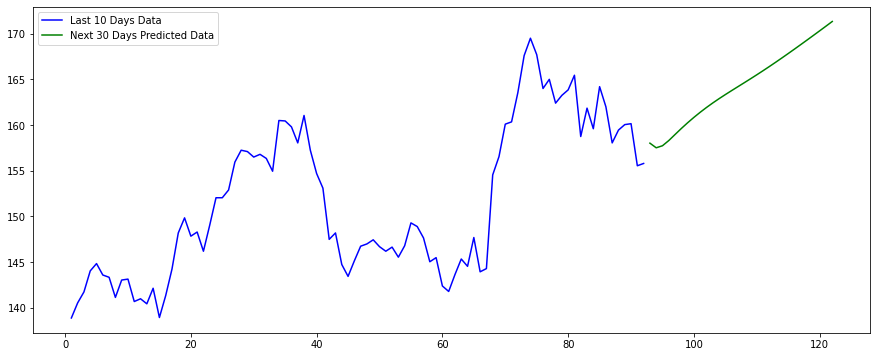

In [36]:
plt.figure(figsize=(15,6))
plt.plot(day_new,scaler.inverse_transform(df1[1143:]),'b', label='Last 10 Days Data')
plt.plot(day_pred,scaler.inverse_transform(lst_output),'g', label='Next 30 Days Predicted Data')
leg = plt.legend();
plt.show()

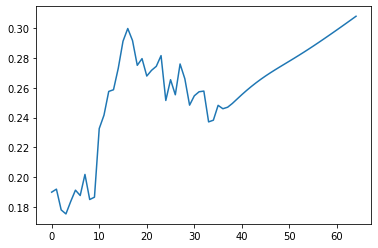

In [37]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [38]:
df3=scaler.inverse_transform(df3).tolist()

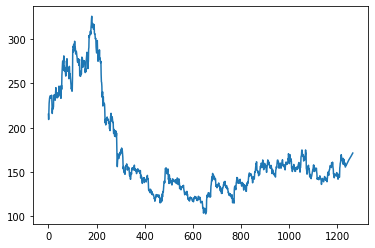

In [39]:
plt.plot(df3)

**The End**